Kritika 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#getting the dataset by reading via pandas
csv_path= "kaggle_new.csv"
data=pd.read_csv(csv_path)
data

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,18/09/2018,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,24/09/2018,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,26/09/2018,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,26/09/2018,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2/10/2018,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320329,9/09/2019,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
320330,10/09/2019,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,10/09/2019,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,10/03/2020,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [4]:
data.dropna(how = 'any', inplace = True)
data


,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
2,26/09/2018,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,26/09/2018,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2/10/2018,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
5,12/10/2018,960000.0,Darling Point,Sydney,NSW,-33.869516,151.237239,2,unit,NSW1221,NSW180
7,25/10/2018,1615000.0,Darling Point,Sydney,NSW,-33.876785,151.233727,2,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320328,11/01/2019,439900.0,Taylor,Canberra,ACT,-35.152423,149.103550,2,townhouse,ACT934,ACT
320330,10/09/2019,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,10/09/2019,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,10/03/2020,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


In [5]:
property_df = data[['price', 'state', 'bedrooms']].copy()
property_df

,price,state,bedrooms
2,1730000.0,NSW,2
3,1928000.0,NSW,3
4,1475000.0,NSW,3
5,960000.0,NSW,2
7,1615000.0,NSW,2
...,...,...,...
320328,439900.0,ACT,2
320330,549900.0,ACT,3
320331,499900.0,ACT,3
320332,434000.0,ACT,3


In [6]:
bedroom = property_df.set_index('state')
bedroom

,price,bedrooms
state,,
NSW,1730000.0,2
NSW,1928000.0,3
NSW,1475000.0,3
NSW,960000.0,2
NSW,1615000.0,2
...,...,...
ACT,439900.0,2
ACT,549900.0,3
ACT,499900.0,3


In [7]:
#Average price with respect to bedroom size in each state 

bedrooms_df = property_df.groupby(['state','bedrooms'],as_index=False).mean().round()
bedrooms_df

,state,bedrooms,price
0,ACT,0,964250.0
1,ACT,1,341233.0
2,ACT,2,448036.0
3,ACT,3,628779.0
4,ACT,4,835605.0
5,ACT,5,1060684.0
6,NSW,0,571222.0
7,NSW,1,661346.0
8,NSW,2,846133.0
9,NSW,3,1113874.0


In [75]:
# Vic data frame with colum state, bedroom , average price
vic_df = bedrooms_df.query('state=="VIC"')
avg_vic_df = vic_df.rename(columns={'price': 'Avg Price'})
avg_vic_df



,state,bedrooms,Avg Price
24,VIC,0,373670.0
25,VIC,1,382225.0
26,VIC,2,624742.0
27,VIC,3,778602.0
28,VIC,4,946544.0
29,VIC,5,1352024.0


bedrooms
0    5.283348e+05
1    3.796082e+05
2    5.282123e+05
3    6.860212e+05
4    8.598562e+05
5    1.160428e+06
Name: Price, dtype: float64


<BarContainer object of 6 artists>

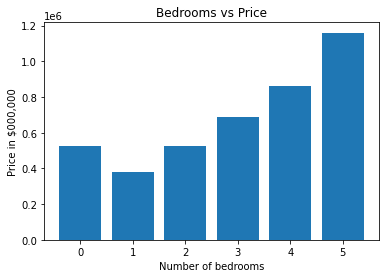

In [14]:
# plotting Bar graph for bedrooms vs Avg price all state 
agg_perbr = bedrooms_df.groupby(['bedrooms']).agg({'price': 'mean'})
#agg_perbr
summary = agg_perbr.reset_index()
#summary
summary_perbr = summary.set_index('bedrooms')
#summary_perbr
summary_perbr.columns = ['Price']
summary_perbr.style.format("${:.9}")
#summary_perbr
x_axis = bedrooms_df['bedrooms'].unique()
x_axis.sort()
price = summary_perbr["Price"]
print(price)
plt.title('Bedrooms vs Price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $000,000')
plt.bar(x_axis, price)



In [79]:
#Calculating and appending avg price increase column
avg_vic_df['Avg_price_incr'] = ""
#vic_df

for ind in avg_vic_df.index:
    if avg_vic_df['bedrooms'][ind] == 0 :
        avg_vic_df['Avg_price_incr'][ind] = 0
    else:
        avg_vic_df['Avg_price_incr'][ind] = avg_vic_df['Avg Price'][ind] - avg_vic_df['Avg Price'][ind - 1]

avg_vic_df

C:\Users\Rahul-Kritika\anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahul-Kritika\anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state,bedrooms,Avg Price,avg_price_incr,Avg_price_incr
24,VIC,0,373670.0,0,0
25,VIC,1,382225.0,8555,8555
26,VIC,2,624742.0,242517,242517
27,VIC,3,778602.0,153860,153860
28,VIC,4,946544.0,167942,167942
29,VIC,5,1352024.0,405480,405480


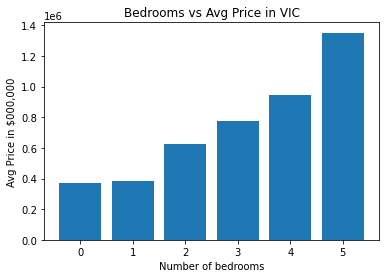

In [80]:
# plotting Bar graph for bedrooms vs Avg price vic
x_axis = avg_vic_df['bedrooms'].unique()
x_axis.sort()
price = avg_vic_df["Avg Price"]

plt.title('Bedrooms vs Avg Price in VIC')
plt.xlabel('Number of bedrooms')
plt.ylabel('Avg Price in $000,000')
vic=plt.bar(x_axis, price)
plt.savefig("vic")

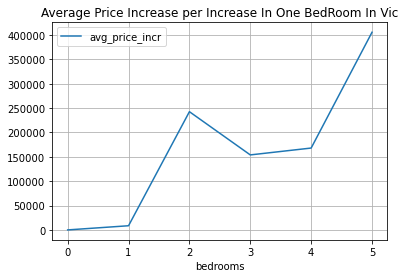

In [81]:
# plotting line graph for bedrooms vs Avg price_increase in vic
lines = avg_vic_df.plot.line(x='bedrooms', y='avg_price_incr',title = "Average Price Increase per Increase In One BedRoom In Vic", grid = 'true')
plt.savefig("lines")

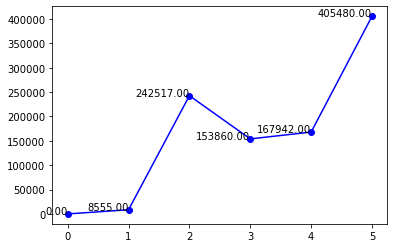

In [82]:
# plotting line graph for bedrooms vs Avg price_increase in vic with values 
plt.clf()

# using some dummy data for this example
xs = avg_vic_df['bedrooms']
ys = avg_vic_df['avg_price_incr']

# 'bo-' means blue color, round points, solid lines
plt.plot(xs,ys,'bo-')


for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plot = plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='right',
                horizontalalignment='right', verticalalignment='top') # horizontal alignment can be left, right or center


plt.savefig("plot")